# Picard's Method for Solving Differential Equations
## Assignment: Real-Life Applications and Problem Solving


**Picard's Method** (also known as Picard's Iteration Method) is a numerical technique used to solve initial value problems (IVPs) of first-order ordinary differential equations.

### Mathematical Foundation

For a differential equation of the form:
```
dy/dx = f(x, y)
```
with initial condition: `y(x₀) = y₀`

The Picard's iterative formula is:
```
y_{n+1}(x) = y₀ + ∫[x₀ to x] f(t, y_n(t)) dt
```

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp
import sympy as sp
from sympy import symbols, Function, Eq, dsolve, integrate, lambdify

# Set up plotting parameters
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 3. Example 1: Simple Population Growth Model

### Problem Statement:
A small town's population grows at a rate proportional to its current population. The differential equation is:

```
dy/dx = 0.1y
```

with initial condition: `y(0) = 1000` (initial population)

Find the population after 5 years using Picard's method.

Initial approximation: y_0(x) = 1000
Iteration 1: y_1(5) = 1500.00
Iteration 2: y_2(5) = 1625.00
Iteration 3: y_3(5) = 1645.84
Iteration 4: y_4(5) = 1648.44
Iteration 5: y_5(5) = 1648.70


/tmp/ipykernel_5522/3068462605.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrand, t_vals)


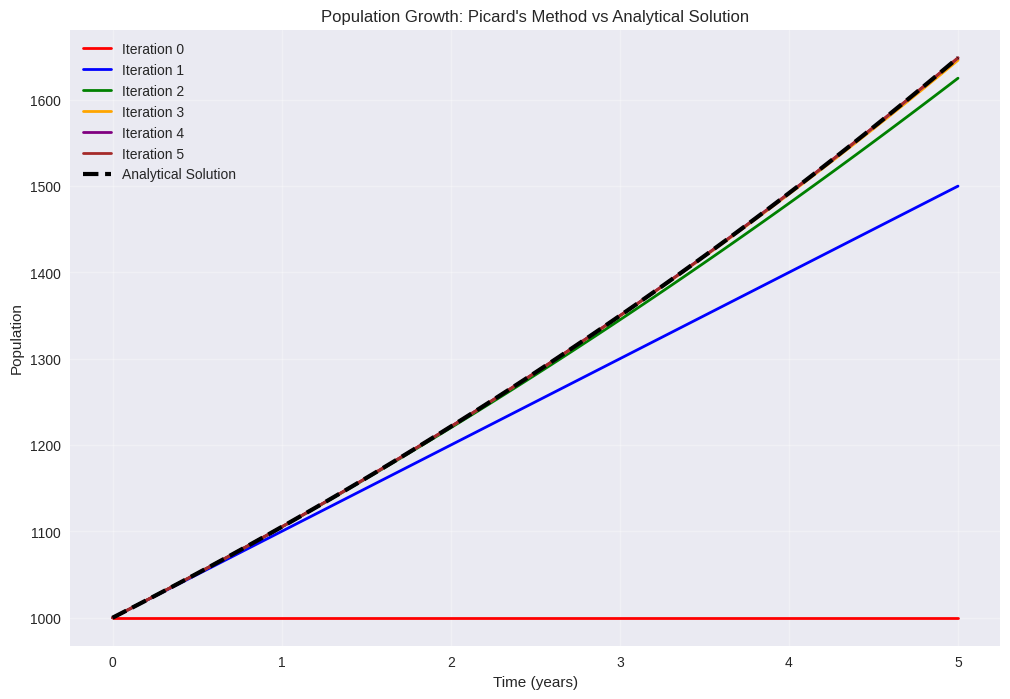


Final Results:
Picard's Method (5 iterations): 1648.70
Analytical Solution: 1648.72
Error: 0.02


In [8]:
def picard_method_simple(x_vals, iterations=5):
    """
    Picard's method for dy/dx = 0.1*y, y(0) = 1000
    """
    y0 = 1000  # Initial condition
    
    # Store all iterations
    y_iterations = []
    
    # Initial approximation: y_0(x) = y0 (constant)
    y_current = np.full_like(x_vals, y0)
    y_iterations.append(y_current.copy())
    
    print(f"Initial approximation: y_0(x) = {y0}")
    
    for n in range(iterations):
        y_new = np.zeros_like(x_vals)
        
        for i, x in enumerate(x_vals):
            # y_{n+1}(x) = y0 + ∫[0 to x] 0.1*y_n(t) dt
            if x == 0:
                y_new[i] = y0
            else:
                # Numerical integration using trapezoidal rule
                t_vals = np.linspace(0, x, 100)
                y_interp = np.interp(t_vals, x_vals, y_current)
                integrand = 0.1 * y_interp
                integral = np.trapz(integrand, t_vals)
                y_new[i] = y0 + integral
        
        y_current = y_new.copy()
        y_iterations.append(y_current.copy())
        
        print(f"Iteration {n+1}: y_{n+1}(5) = {y_current[x_vals == 5.0][0]:.2f}")
    
    return y_iterations

# Solve the problem
x_range = np.linspace(0, 5, 101)
iterations = picard_method_simple(x_range, iterations=5)

# Analytical solution for comparison
analytical_solution = 1000 * np.exp(0.1 * x_range)

# Plot results
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for i, y_iter in enumerate(iterations):
    plt.plot(x_range, y_iter, colors[i], label=f'Iteration {i}', linewidth=2)

plt.plot(x_range, analytical_solution, 'black', linestyle='--', 
         label='Analytical Solution', linewidth=3)

plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.title('Population Growth: Picard\'s Method vs Analytical Solution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nFinal Results:")
print(f"Picard's Method (5 iterations): {iterations[-1][x_range == 5.0][0]:.2f}")
print(f"Analytical Solution: {analytical_solution[x_range == 5.0][0]:.2f}")
print(f"Error: {abs(iterations[-1][x_range == 5.0][0] - analytical_solution[x_range == 5.0][0]):.2f}")

## 4. Example 2: RC Circuit Analysis

### Problem Statement:
An RC circuit with a time-varying voltage source. The differential equation governing the capacitor voltage is:

```
dV_c/dt + V_c/(RC) = V_s(t)/(RC)
```

Simplified form: `dV_c/dt = -2V_c + 10sin(t)`

with initial condition: `V_c(0) = 0`

**Physical Meaning:**
- `V_c`: Capacitor voltage
- `V_s(t) = 10sin(t)`: Time-varying input voltage
- `RC = 0.5`: Time constant

RC Circuit Analysis using Picard's Method
Differential Equation: dV_c/dt = -2*V_c + 10*sin(t)
Initial Condition: V_c(0) = 0

Iterations:
Iteration 1: V_c(π) = 20.0000 V
Iteration 1: V_c(π) = 20.0000 V


/tmp/ipykernel_5522/4000978075.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, 0, t)
/tmp/ipykernel_5522/4000978075.py:31: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, 0, t)


Iteration 2: V_c(π) = -42.8319 V
Iteration 3: V_c(π) = 74.5734 V
Iteration 3: V_c(π) = 74.5734 V
Iteration 4: V_c(π) = -87.5782 V
Iteration 4: V_c(π) = -87.5782 V


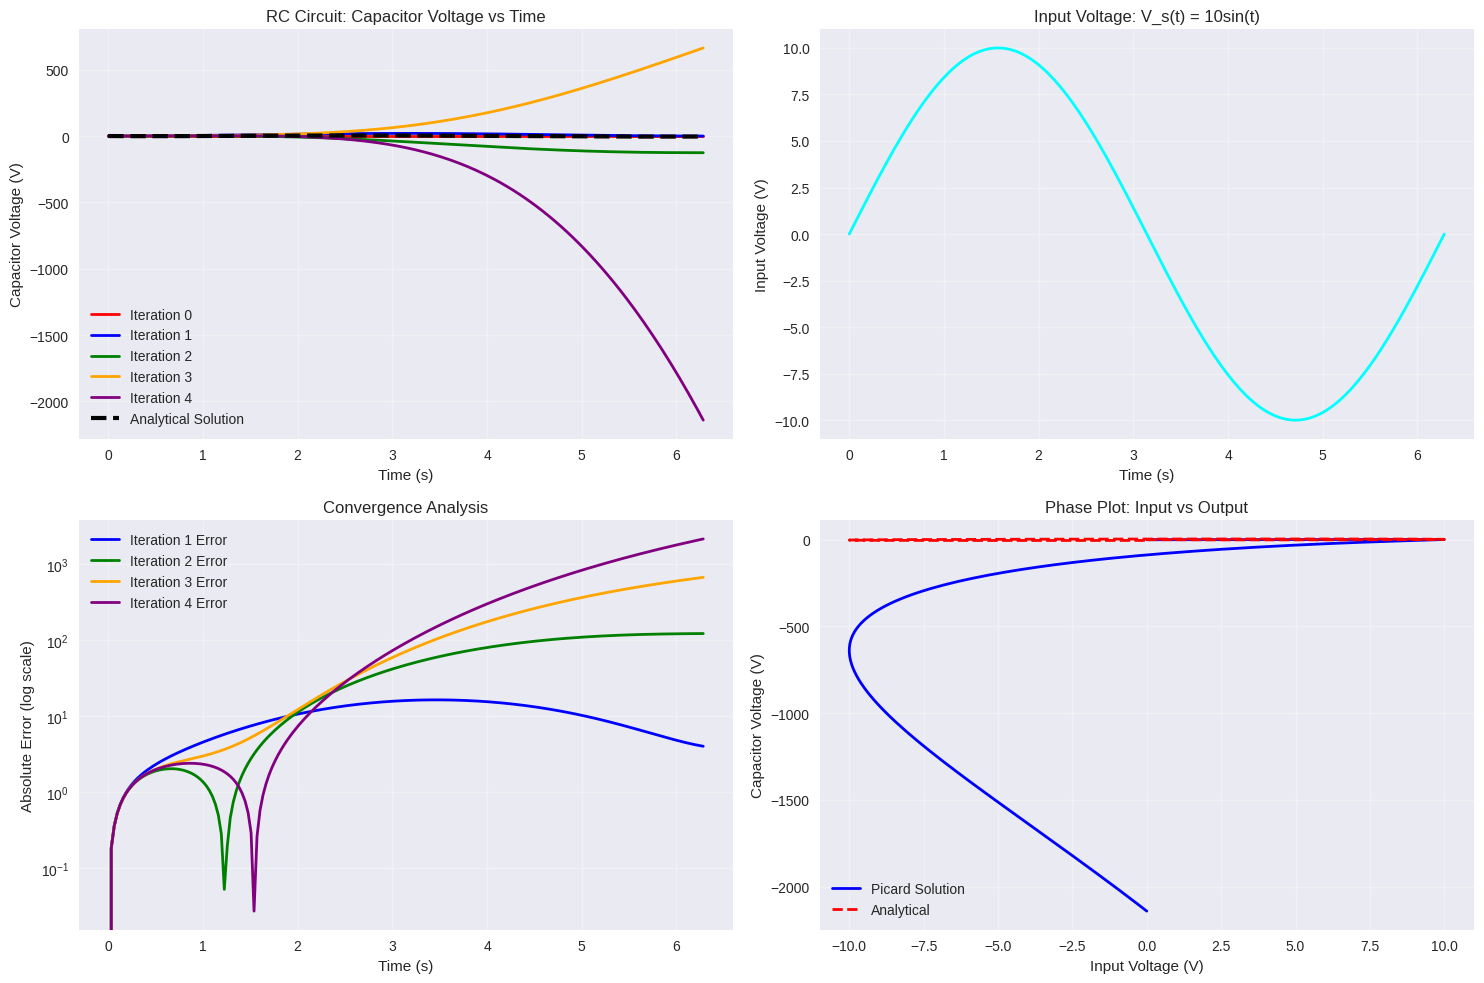


Final Comparison at t = π:
Picard's Method: -87.578190 V
Analytical Solution: 4.007470 V
Absolute Error: 91.585660 V


In [9]:
def picard_rc_circuit(x_vals, iterations=4):
    """
    Picard's method for RC circuit: dV_c/dt = -2*V_c + 10*sin(t), V_c(0) = 0
    """
    V0 = 0  # Initial voltage
    
    # Store all iterations
    V_iterations = []
    
    # Initial approximation: V_0(t) = 0
    V_current = np.zeros_like(x_vals)
    V_iterations.append(V_current.copy())
    
    print(f"RC Circuit Analysis using Picard's Method")
    print(f"Differential Equation: dV_c/dt = -2*V_c + 10*sin(t)")
    print(f"Initial Condition: V_c(0) = 0")
    print(f"\nIterations:")
    
    for n in range(iterations):
        V_new = np.zeros_like(x_vals)
        
        for i, t in enumerate(x_vals):
            if t == 0:
                V_new[i] = V0
            else:
                # V_{n+1}(t) = V0 + ∫[0 to t] (-2*V_n(s) + 10*sin(s)) ds
                def integrand(s):
                    V_s = np.interp(s, x_vals, V_current)
                    return -2 * V_s + 10 * np.sin(s)
                
                integral, _ = quad(integrand, 0, t)
                V_new[i] = V0 + integral
        
        V_current = V_new.copy()
        V_iterations.append(V_current.copy())
        
        print(f"Iteration {n+1}: V_c(π) = {V_current[np.abs(x_vals - np.pi).argmin()]:.4f} V")
    
    return V_iterations

# Analytical solution for RC circuit
def analytical_rc_solution(t):
    """Analytical solution for the RC circuit"""
    return (10/5) * (np.sin(t) - 2*np.cos(t)) + (20/5) * np.exp(-2*t)

# Solve the RC circuit problem
t_range = np.linspace(0, 2*np.pi, 201)
rc_iterations = picard_rc_circuit(t_range, iterations=4)

# Analytical solution
analytical_rc = analytical_rc_solution(t_range)

# Plot results
plt.figure(figsize=(15, 10))

# Main plot
plt.subplot(2, 2, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, V_iter in enumerate(rc_iterations):
    plt.plot(t_range, V_iter, colors[i], label=f'Iteration {i}', linewidth=2)
plt.plot(t_range, analytical_rc, 'black', linestyle='--', 
         label='Analytical Solution', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('Capacitor Voltage (V)')
plt.title('RC Circuit: Capacitor Voltage vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Input voltage
plt.subplot(2, 2, 2)
plt.plot(t_range, 10*np.sin(t_range), 'cyan', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Input Voltage (V)')
plt.title('Input Voltage: V_s(t) = 10sin(t)')
plt.grid(True, alpha=0.3)

# Error analysis
plt.subplot(2, 2, 3)
for i in range(1, len(rc_iterations)):
    error = np.abs(rc_iterations[i] - analytical_rc)
    plt.semilogy(t_range, error, colors[i], label=f'Iteration {i} Error', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Absolute Error (log scale)')
plt.title('Convergence Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# Phase plot
plt.subplot(2, 2, 4)
input_voltage = 10*np.sin(t_range)
plt.plot(input_voltage, rc_iterations[-1], 'blue', linewidth=2, label='Picard Solution')
plt.plot(input_voltage, analytical_rc, 'red', linestyle='--', linewidth=2, label='Analytical')
plt.xlabel('Input Voltage (V)')
plt.ylabel('Capacitor Voltage (V)')
plt.title('Phase Plot: Input vs Output')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final comparison
print(f"\nFinal Comparison at t = π:")
t_pi_idx = np.abs(t_range - np.pi).argmin()
print(f"Picard's Method: {rc_iterations[-1][t_pi_idx]:.6f} V")
print(f"Analytical Solution: {analytical_rc[t_pi_idx]:.6f} V")
print(f"Absolute Error: {abs(rc_iterations[-1][t_pi_idx] - analytical_rc[t_pi_idx]):.6f} V")

## Example 3: Drug Concentration in Bloodstream

### Problem Statement:
The concentration of a drug in the bloodstream follows the differential equation:

```
dC/dt = -kC + R(t)
```

Where:
- `C(t)`: Drug concentration at time t
- `k = 0.3`: Elimination rate constant
- `R(t) = 5e^(-0.1t)`: Drug input rate (decreasing over time)
- Initial condition: `C(0) = 0`

**Medical Significance:**
- Models how drug concentration changes over time
- Helps determine optimal dosing schedules
- Critical for patient safety and treatment efficacy

Drug Concentration Analysis using Picard's Method
Differential Equation: dC/dt = -0.3*C + 5*exp(-0.1*t)
Initial Condition: C(0) = 0

Iterations:
Iteration 1: Peak concentration = 43.2332 mg/L at t = 20.00 hours


/tmp/ipykernel_5522/1856666548.py:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, 0, t)
/tmp/ipykernel_5522/1856666548.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, 0, t)


Iteration 2: Peak concentration = 6.8476 mg/L at t = 2.90 hours
Iteration 3: Peak concentration = 262.0321 mg/L at t = 20.00 hours
Iteration 3: Peak concentration = 262.0321 mg/L at t = 20.00 hours
Iteration 4: Peak concentration = 9.0025 mg/L at t = 4.30 hours
Iteration 4: Peak concentration = 9.0025 mg/L at t = 4.30 hours
Iteration 5: Peak concentration = 431.2774 mg/L at t = 20.00 hours
Iteration 5: Peak concentration = 431.2774 mg/L at t = 20.00 hours


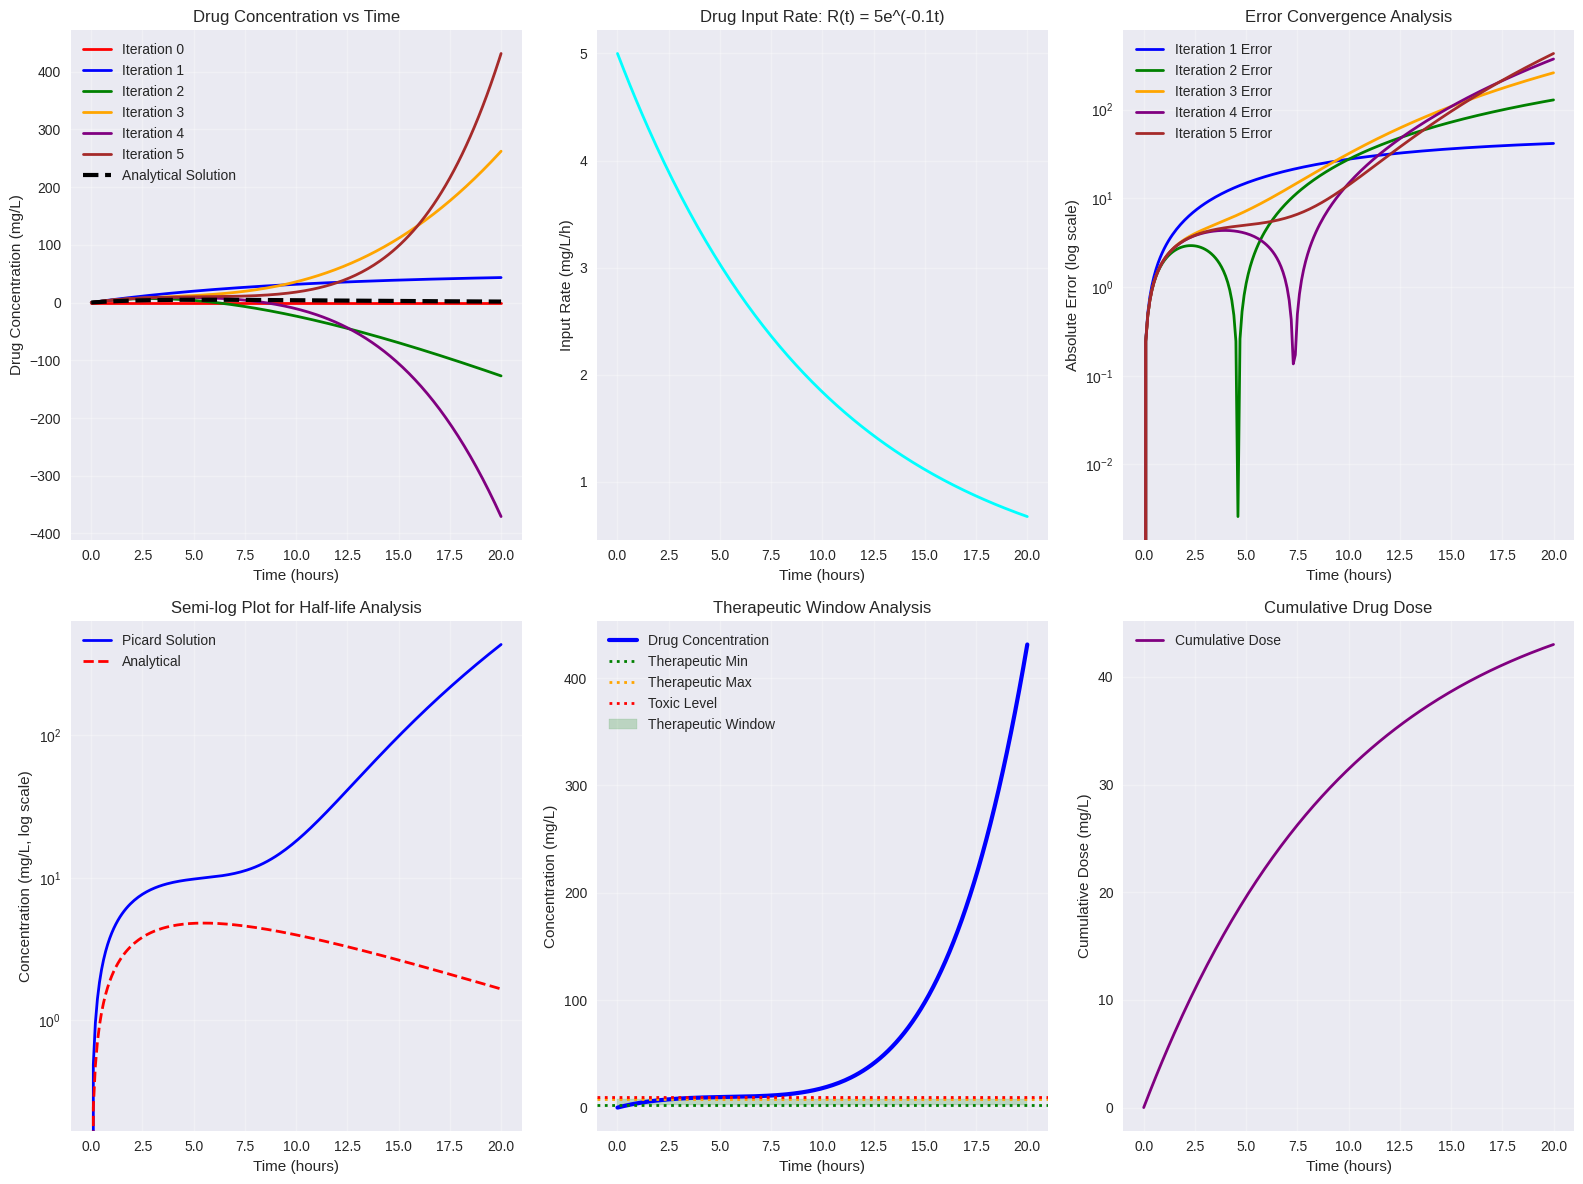


=== Clinical Analysis ===
Peak Concentration: 431.2774 mg/L at t = 20.00 hours
Time in Therapeutic Window: 2.20 hours
Maximum Safe Dose Achieved: No

Final Comparison at t = 10 hours:
Picard's Method: 18.086570 mg/L
Analytical Solution: 3.976155 mg/L
Relative Error: 354.8759%


In [10]:
def picard_drug_concentration(t_vals, iterations=5):
    """
    Picard's method for drug concentration: dC/dt = -0.3*C + 5*exp(-0.1*t), C(0) = 0
    """
    C0 = 0  # Initial concentration
    k = 0.3  # Elimination rate
    
    # Store all iterations
    C_iterations = []
    
    # Initial approximation: C_0(t) = 0
    C_current = np.zeros_like(t_vals)
    C_iterations.append(C_current.copy())
    
    print(f"Drug Concentration Analysis using Picard's Method")
    print(f"Differential Equation: dC/dt = -0.3*C + 5*exp(-0.1*t)")
    print(f"Initial Condition: C(0) = 0")
    print(f"\nIterations:")
    
    for n in range(iterations):
        C_new = np.zeros_like(t_vals)
        
        for i, t in enumerate(t_vals):
            if t == 0:
                C_new[i] = C0
            else:
                # C_{n+1}(t) = C0 + ∫[0 to t] (-0.3*C_n(s) + 5*exp(-0.1*s)) ds
                def integrand(s):
                    C_s = np.interp(s, t_vals, C_current)
                    return -k * C_s + 5 * np.exp(-0.1 * s)
                
                integral, _ = quad(integrand, 0, t)
                C_new[i] = C0 + integral
        
        C_current = C_new.copy()
        C_iterations.append(C_current.copy())
        
        # Find peak concentration
        peak_idx = np.argmax(C_current)
        peak_time = t_vals[peak_idx]
        peak_concentration = C_current[peak_idx]
        
        print(f"Iteration {n+1}: Peak concentration = {peak_concentration:.4f} mg/L at t = {peak_time:.2f} hours")
    
    return C_iterations

# Analytical solution for drug concentration
def analytical_drug_solution(t):
    """Analytical solution for the drug concentration problem"""
    return (25/2) * (np.exp(-0.1*t) - np.exp(-0.3*t))

# Solve the drug concentration problem
t_drug = np.linspace(0, 20, 201)
drug_iterations = picard_drug_concentration(t_drug, iterations=5)

# Analytical solution
analytical_drug = analytical_drug_solution(t_drug)

# Plot comprehensive analysis
plt.figure(figsize=(16, 12))

# Main concentration plot
plt.subplot(2, 3, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for i, C_iter in enumerate(drug_iterations):
    plt.plot(t_drug, C_iter, colors[i], label=f'Iteration {i}', linewidth=2)
plt.plot(t_drug, analytical_drug, 'black', linestyle='--', 
         label='Analytical Solution', linewidth=3)
plt.xlabel('Time (hours)')
plt.ylabel('Drug Concentration (mg/L)')
plt.title('Drug Concentration vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Input rate function
plt.subplot(2, 3, 2)
input_rate = 5 * np.exp(-0.1 * t_drug)
plt.plot(t_drug, input_rate, 'cyan', linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Input Rate (mg/L/h)')
plt.title('Drug Input Rate: R(t) = 5e^(-0.1t)')
plt.grid(True, alpha=0.3)

# Error convergence
plt.subplot(2, 3, 3)
for i in range(1, len(drug_iterations)):
    error = np.abs(drug_iterations[i] - analytical_drug)
    plt.semilogy(t_drug, error, colors[i], label=f'Iteration {i} Error', linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Absolute Error (log scale)')
plt.title('Error Convergence Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# Pharmacokinetic parameters
plt.subplot(2, 3, 4)
# Calculate elimination rate (slope of log concentration)
final_solution = drug_iterations[-1]
log_conc = np.log(final_solution[final_solution > 0.1])  # Only where concentration is significant
time_subset = t_drug[final_solution > 0.1]

plt.semilogy(t_drug, final_solution, 'blue', linewidth=2, label='Picard Solution')
plt.semilogy(t_drug, analytical_drug, 'red', linestyle='--', linewidth=2, label='Analytical')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L, log scale)')
plt.title('Semi-log Plot for Half-life Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# Therapeutic window analysis
plt.subplot(2, 3, 5)
therapeutic_min = 2.0  # mg/L
therapeutic_max = 8.0  # mg/L
toxic_level = 10.0     # mg/L

plt.plot(t_drug, final_solution, 'blue', linewidth=3, label='Drug Concentration')
plt.axhline(y=therapeutic_min, color='green', linestyle=':', linewidth=2, label='Therapeutic Min')
plt.axhline(y=therapeutic_max, color='orange', linestyle=':', linewidth=2, label='Therapeutic Max')
plt.axhline(y=toxic_level, color='red', linestyle=':', linewidth=2, label='Toxic Level')
plt.fill_between(t_drug, therapeutic_min, therapeutic_max, alpha=0.2, color='green', label='Therapeutic Window')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Therapeutic Window Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# Cumulative dose analysis
plt.subplot(2, 3, 6)
cumulative_dose = np.zeros_like(t_drug)
for i in range(1, len(t_drug)):
    dt = t_drug[i] - t_drug[i-1]
    cumulative_dose[i] = cumulative_dose[i-1] + input_rate[i] * dt

plt.plot(t_drug, cumulative_dose, 'purple', linewidth=2, label='Cumulative Dose')
plt.xlabel('Time (hours)')
plt.ylabel('Cumulative Dose (mg/L)')
plt.title('Cumulative Drug Dose')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clinical analysis
peak_idx = np.argmax(final_solution)
peak_time = t_drug[peak_idx]
peak_concentration = final_solution[peak_idx]

# Find therapeutic window duration
therapeutic_indices = np.where((final_solution >= therapeutic_min) & (final_solution <= therapeutic_max))[0]
if len(therapeutic_indices) > 0:
    therapeutic_start = t_drug[therapeutic_indices[0]]
    therapeutic_end = t_drug[therapeutic_indices[-1]]
    therapeutic_duration = therapeutic_end - therapeutic_start
else:
    therapeutic_duration = 0

print(f"\n=== Clinical Analysis ===")
print(f"Peak Concentration: {peak_concentration:.4f} mg/L at t = {peak_time:.2f} hours")
print(f"Time in Therapeutic Window: {therapeutic_duration:.2f} hours")
print(f"Maximum Safe Dose Achieved: {'Yes' if peak_concentration < toxic_level else 'No'}")
print(f"\nFinal Comparison at t = 10 hours:")
t_10_idx = np.abs(t_drug - 10).argmin()
print(f"Picard's Method: {final_solution[t_10_idx]:.6f} mg/L")
print(f"Analytical Solution: {analytical_drug[t_10_idx]:.6f} mg/L")
print(f"Relative Error: {abs(final_solution[t_10_idx] - analytical_drug[t_10_idx])/analytical_drug[t_10_idx]*100:.4f}%")